In [72]:
%matplotlib inline
import os
import cv2 
import common 
import numpy as np
from matplotlib import pyplot as plt
from skimage import img_as_float
from pathlib import Path

In [36]:
def imshow_all(*images, titles=None, axis=None):
    images = [img_as_float(img) for img in images]

    if titles is None:
        titles = [''] * len(images)
    vmin = min(map(np.min, images))
    vmax = max(map(np.max, images))
    ncols = len(images)
    height = 5
    width = height * len(images)
    fig, axes = plt.subplots(nrows=1, ncols=ncols,
                             figsize=(width, height))
    if len(images)>1:
        for ax, img, label in zip(axes.ravel(), images, titles):
            ax.imshow(img, vmin=vmin, vmax=vmax)
            if axis is not None:
                ax.axis('off')
            ax.set_title(label)
    else:
        plt.imshow(images[0])

def cb(*images, cvtColor=None):
    for img in images:
        return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
def ch(*images, cvtColor=None):
    for img in images:
        return cv2.cvtColor(img, cv2.COLOR_BGR2HSV)    
def cbgr(*images, cvtColor=None):
    for img in images:
        return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
def cg(*images, cvtColor=None):
    for img in images:
        return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
def cbg(*images, cvtColor=None):
    for img in images:
        return cb(cg(cb(img)))

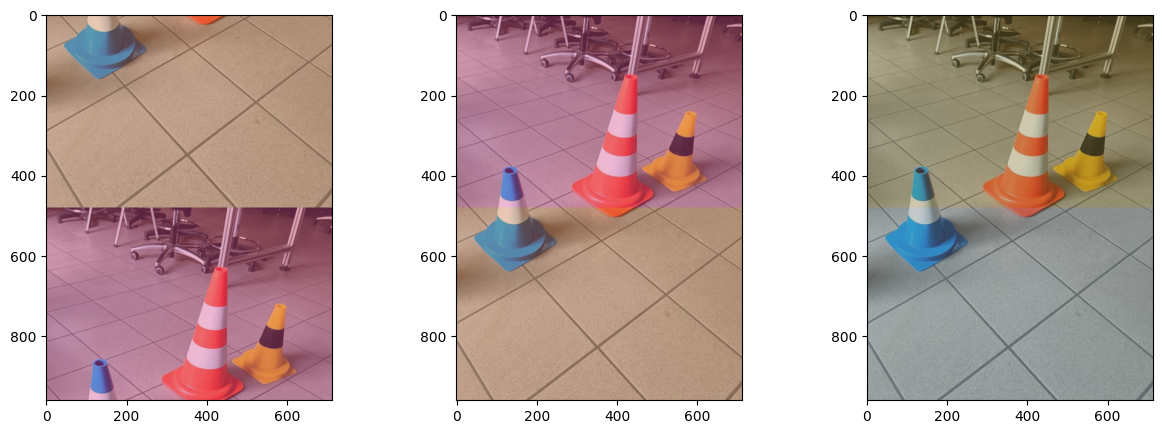

In [74]:
# ORIGINALE
#   Y=541 X=128: [250, 158,  3]  --> conetto azzurro
#                [200, 144,  50]
#   Y=267 X=564: [40, 195, 240]  --> conetto aranc
#                [50, 166, 200]                

def ff2(_img0,_a):
    _img = _img0.copy()
    (h,w) = _img.shape[0:2]
    for y in range(h):
        for x in range(w):
            _img[y,x] = _img[y,x] - _a
    return _img


img0 = cb(cv2.imread('corrupted.png'))
(h,w)= img0.shape[0:2]
i8 = img0[int(h/2):h,0:w]
i9 = img0[0:int(h/2),0:w]
img2 = cv2.vconcat([i8, i9])

a1 = cbgr(img2)[541,128] - [200, 144,  50]
a2 = cbgr(img2)[267,564] - [50, 166, 200]

i8cc = ff2(i8,np.flip(a2))
i9cc = ff2(i9,np.flip(a1))

img2cc = cv2.vconcat([i8cc, i9cc])

cv2.imwrite("output1.png", cb(img2cc))

imshow_all(img0, img2,img2cc)


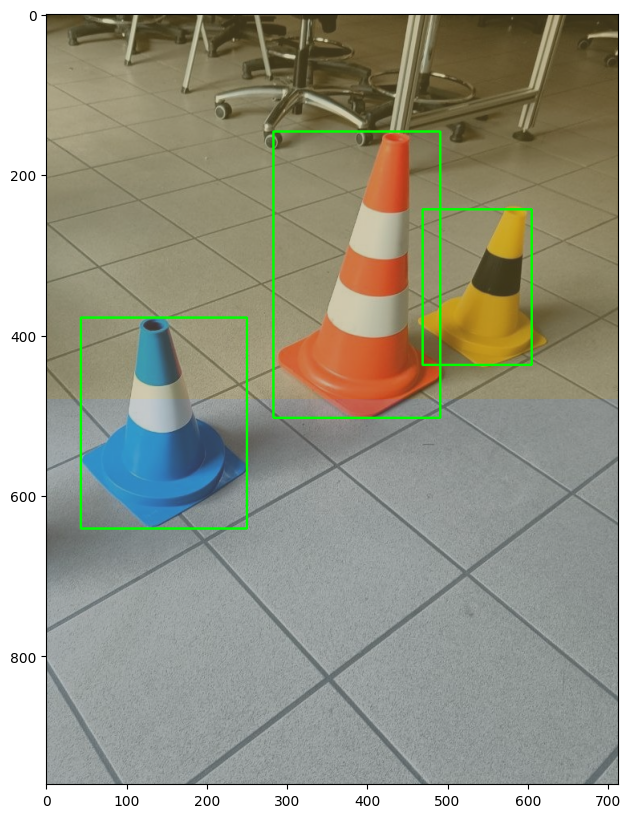

In [69]:
image = None
image = cb(img2cc.copy())

# Convert image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for cones colors in HSV space
o1 = np.array([0, 20, 160])
o2 = np.array([20, 225, 250])

b1 = np.array([90, 50, 50])
b2 = np.array([130, 255, 255])
  
y1 = np.array([12, 202, 149]) 
y2 = np.array([32, 222, 229])

def cones3(_hsv,_color,_low1,_up1):
    #(h,w)= _hsv.shape[0:2]
    mask = cv2.inRange(_hsv, _low1, _up1)

    # remove noise and refine the mask
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bounding_rectangles = [cv2.boundingRect(contour) for contour in contours]

    # Draw bounding rectangles around detected cones
    #for x, y, w, h in bounding_rectangles:
        #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Draw rectangle around cone

    # coordinates of the bounding rectangle that covers all smaller rectangles.
    x_min = min(rect[0] for rect in bounding_rectangles)
    y_min = min(rect[1] for rect in bounding_rectangles)
    x_max = max(rect[0] + rect[2] for rect in bounding_rectangles)
    y_max = max(rect[1] + rect[3] for rect in bounding_rectangles)
    coord1 = [x_min,y_min,x_max,y_max]
    coord1_string = "(" + ", ".join(str(item) for item in coord1) + ")"

    with open("results1.txt", "a") as file:
        file.write("%s cone: %s\n" % (_color ,coord1_string))

    # Draw the bigger rectangle
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2) 

cones3(hsv,"orange",o1,o2)
cones3(hsv,"blue",b1,b2)
cones3(hsv,"yellow",y1,y2)

plt.imshow(cb(image))